In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as signal
from pathlib import Path
from scipy.spatial.distance import euclidean
from scipy.signal import medfilt
from scipy.signal import sosfiltfilt, butter
from sklearn.cluster import KMeans

import sys
sys.path.append("../src")
from conversion_mat_to_py import mat2dict, pretty_dict, matobj2dict, dict2ntuple, name_data
from sources_cv2 import defineStartEnd, count_frames
from save_datas import save_data
from data_conversions import acc_to_angle
from filters import filter_butter
from fast_open_data import open_data_filter

# -> Escolher voluntário e chave

* open_data_filter(Voluntary => 1 até 90, key => 'S1_Synched', 'S2_Synched', 'I1', 'I2', 'S1', 'S2' ...)

In [2]:
S, L, R = open_data_filter(52, key = 'S1_Synched')

In [3]:
# dados para voluntário 52
estimated_R = [ 30, 350, 555, 870]
estimated_L = [ 80, 370, 570, 830]
estimated_S = [ 140, 264, 365, 570, 647, 865]

sequece_R_L = [1,2,1,3,1]
sequece_S = [1,2,3,1,2,3,1]

In [4]:
sequence = sequece_S.copy()
sequence.extend(sequece_R_L) 
classes = np.unique(sequence)

In [5]:
def sep_modo(data, estimated_data, modo_sequence, classes):
    
    
    V_seq = np.zeros(len(modo_sequence))
    V_modo = np.zeros(len(classes))
    
    modo = np.zeros((data.shape))

    for i in range(len(modo_sequence)):
        if i == 0:
            modo[:estimated_data[i]] = modo_sequence[i]
            V_seq[i] = np.mean(np.diff(data[:estimated_data[i]]))
            
            
        elif i == (len(estimated_data)):
            modo[estimated_data[i-1]:] = modo_sequence[i]
            V_seq[i] = np.mean(np.diff(data[estimated_data[i-1]:]))
        
        else:
            modo[estimated_data[i-1]:estimated_data[i]] = modo_sequence[i]
            V_seq[i] = np.mean(np.diff(data[estimated_data[i-1]:estimated_data[i]]))
                    
    for n in range(len(classes)):
        idx = np.where(np.array(modo_sequence) == n+1)[0]
        V_modo[n] = np.mean(np.array(V_seq)[idx])
        
    return modo, V_seq, V_modo
            

In [6]:
modo, V_seq, V_modo = sep_modo(S, estimated_S, sequece_S, classes)

In [7]:
teste = np.c_[ S, L, R]

In [8]:
kmeans = KMeans(n_clusters = 3)

In [9]:
kmeans.fit(teste)

KMeans(n_clusters=3)

In [10]:
centroides = kmeans.cluster_centers_

In [11]:
rotulos = kmeans.labels_

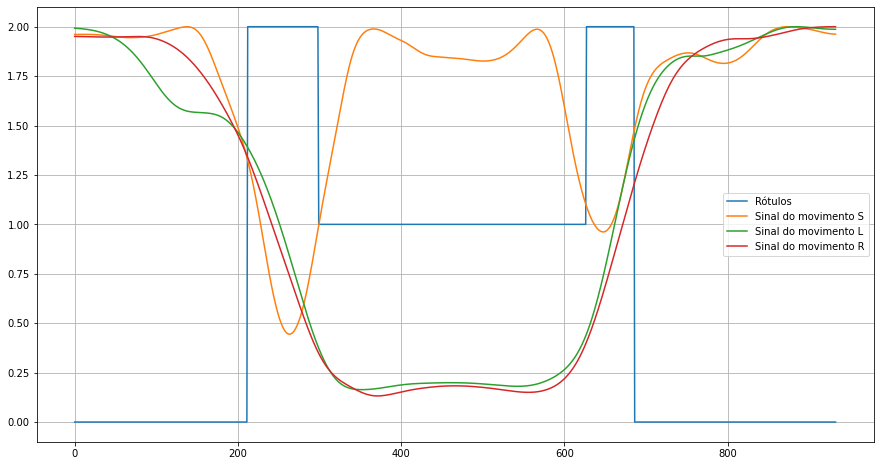

In [12]:
plt.figure(figsize=[15,8])
plt.plot(rotulos, label = 'Rótulos')
plt.plot(S/max(S)*2, label = 'Sinal do movimento S')
plt.plot(L/max(L)*2, label = 'Sinal do movimento L')
plt.plot(R/max(R)*2, label = 'Sinal do movimento R')
plt.legend()
plt.grid()
plt.show()

In [13]:
kmeans_S = KMeans(n_clusters = 3)

In [14]:
S_1 = S/max(S)*2
teste_2 = np.c_[ S_1, modo]

In [15]:
kmeans_S.fit(teste_2)
rotulos = kmeans_S.labels_

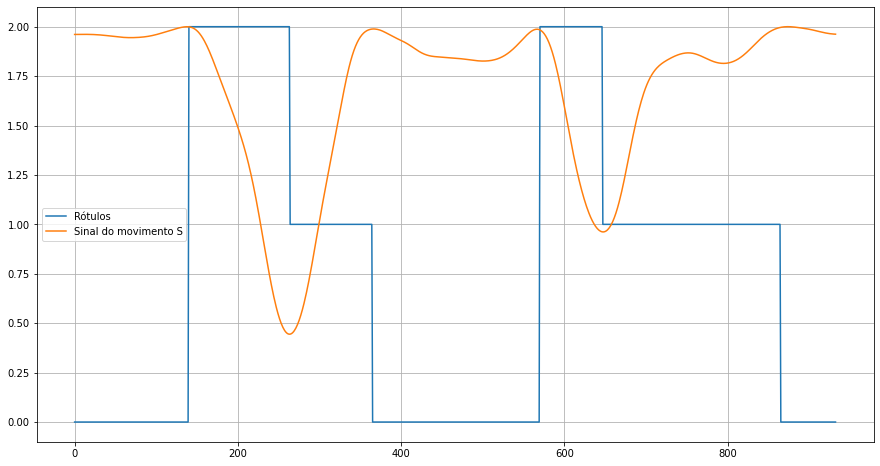

In [16]:
plt.figure(figsize=[15,8])
plt.plot(rotulos, label = 'Rótulos')
plt.plot(S/max(S)*2, label = 'Sinal do movimento S')
plt.legend()
plt.grid()
plt.show()

In [17]:
kmeans_L_R = KMeans(n_clusters = 3)
modo_L, V_seq_L, V_modo_L = sep_modo(L, estimated_L, sequece_R_L, classes)
modo_R, V_seq_R, V_modo_R = sep_modo(R, estimated_R, sequece_R_L, classes)

In [18]:
L_1 = L/max(L)*2
R_1 = R/max(R)*2
teste_3 = np.c_[ R_1, modo_R]

In [19]:
kmeans_L_R.fit(teste_3)
rotulos = kmeans_L_R.labels_

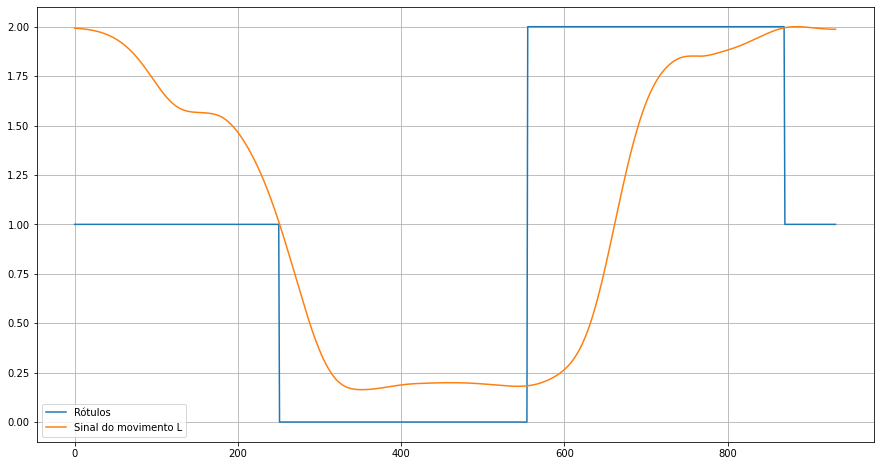

In [20]:
plt.figure(figsize=[15,8])
plt.plot(rotulos, label = 'Rótulos')
plt.plot(L_1, label = 'Sinal do movimento L')
#plt.plot(R_1, label = 'Sinal do movimento R')
plt.legend()
plt.grid()
plt.show()